Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
fi = PolynomialFeatures(1).fit_transform(X)
print(fi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
def calculate_w (fi, y):
    fi_t = np.transpose(fi)
    w = linalg.inv(np.dot(fi_t, fi))
    w = np.dot(np.dot(w, fi_t), y)
    return w;

In [5]:
from numpy import linalg
# Vaš kôd ovdje
w = calculate_w(fi, y);
print(w)
w = linalg.pinv(fi)
w = np.dot(w, y)
print(w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Pogreska ucenja je = 2.042857142857143


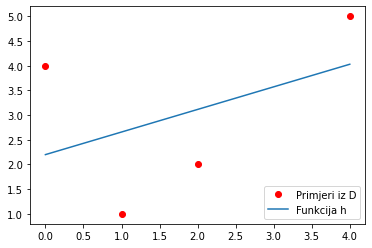

In [6]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
h = np.dot(fi, w)
plt.plot(X, y, 'ro', label = 'Primjeri iz D')
plt.plot(X, h, label = 'Funkcija h')
plt.legend(loc = 'lower right')
E = mean_squared_error(y, h)
print('Pogreska ucenja je = ' + str(E))
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
# Vaš kôd ovdje
try:
    w = np.dot(linalg.inv(fi), y)
    print(w)
except:
    print("Za primjere iz D tezine w ne mozemo naci rjesavanjem sustava.")
    print("Koristi se pseudoinverz.")

Za primjere iz D tezine w ne mozemo naci rjesavanjem sustava.
Koristi se pseudoinverz.


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [8]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
reg = LinearRegression().fit(fi, y)
print('Tezine = ')
print(reg.coef_[1])
print(reg.intercept_)
h1 = reg.predict(fi)
print('Predikcija = ' + str(h1))
E1 = mean_squared_error(y, h1)
print('Pogreska ucenja je = ' + str(E1))
print('Razlika u izracunu pogreske ucenja = ' + str(E-E1))

Tezine = 
0.4571428571428572
2.2
Predikcija = [2.2        2.65714286 3.11428571 4.02857143]
Pogreska ucenja je = 2.042857142857143
Razlika u izracunu pogreske ucenja = 0.0


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    vel = size(X)
    y = f(X) + normal(0, noise, size = (size(X), 1))
    return y

In [10]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [11]:
# Vaš kôd ovdje
N = 50
donja_granica = -5
gornja_granica = 5
s = 200
x_2 = make_instances(donja_granica, gornja_granica, N)
f = lambda x: 5 + x - 2 * pow(x, 2) - 5 * pow(x, 3)
y_2 = make_labels(x_2, f, s)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

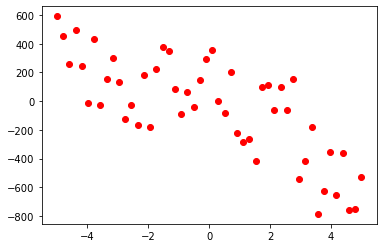

In [12]:
# Vaš kôd ovdje
plt.scatter(x_2, y_2, color='red', label = 'Primjeri za ucenje')
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Pogreska ucenja je = 40984.58617417839


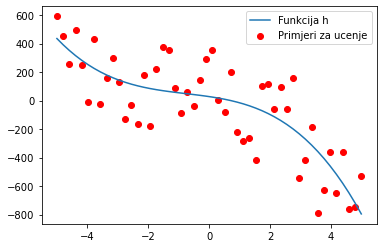

In [13]:
# Vaš kôd ovdje
from sklearn.preprocessing import PolynomialFeatures
d = 3
pol_fi = PolynomialFeatures(d).fit_transform(x_2)
w = linalg.pinv(pol_fi)
w = np.dot(w, y_2)
h2 = np.dot(pol_fi, w)
plt.plot(x_2, h2, label = 'Funkcija h')
plt.scatter(x_2, y_2, color='red', label = 'Primjeri za ucenje')
plt.legend(loc = 'upper right')
E2 = mean_squared_error(y_2, h2)
print('Pogreska ucenja je = ' + str(E2))
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreska ucenja za d = 1 je = 50522.74568935888
Pogreska ucenja za d = 3 je = 40984.58617417839
Pogreska ucenja za d = 5 je = 38420.92011609422
Pogreska ucenja za d = 10 je = 34238.75648655964
Pogreska ucenja za d = 20 je = 21578.356898882124


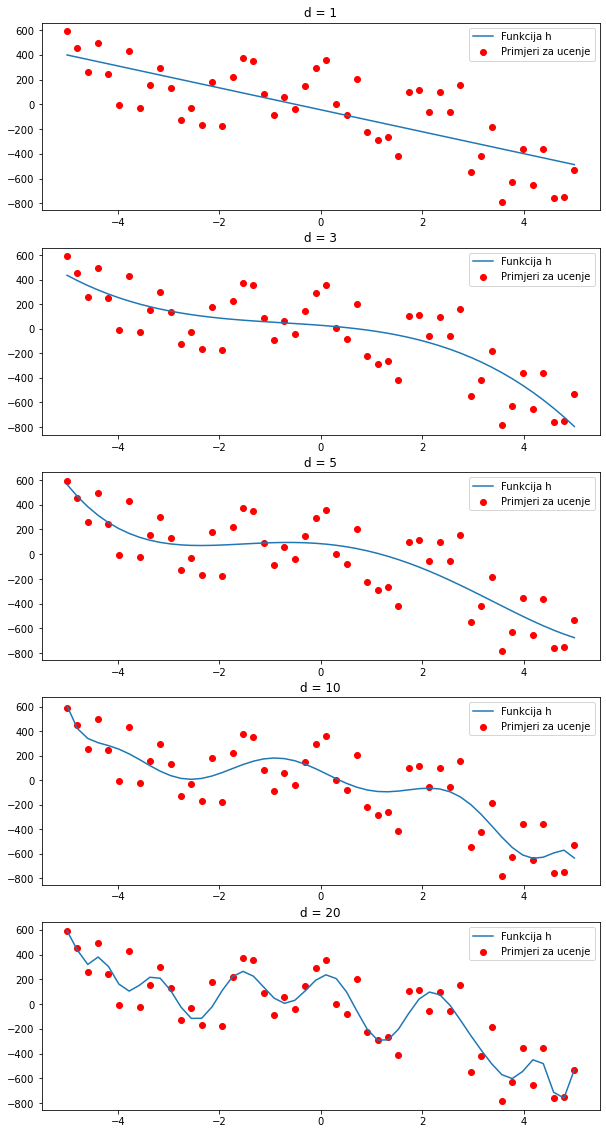

In [14]:
# Vaš kôd ovdje
d = [1, 3, 5, 10, 20]
k = 0
fig, axs = plt.subplots(5, 1, figsize = (10, 20))
for i in d:
    d_fi = PolynomialFeatures(i).fit_transform(x_2)
    w = linalg.pinv(d_fi)
    w = np.dot(w, y_2)
    h3 = np.dot(d_fi, w)
    E3 = mean_squared_error(y_2, h3)
    print('Pogreska ucenja za d = ' + str(i) + ' je = ' + str(E3))
    axs[k].plot(x_2, h3, label = 'Funkcija h')
    axs[k].scatter(x_2, y_2, color='red', label = 'Primjeri za ucenje')
    axs[k].title.set_text('d = ' + str(i))
    axs[k].legend(loc = 'upper right')
    k += 1
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

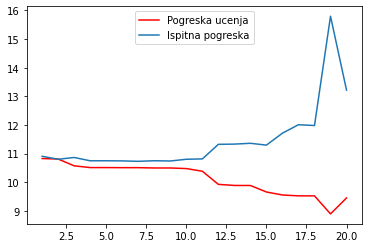

In [15]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
d = range(1, 21)
train_E = []
test_E = []
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(x_2, y_2, test_size = 0.5)
for i in d:
    train_fi = PolynomialFeatures(i).fit_transform(X_train_3)
    w = linalg.pinv(train_fi)
    w = np.dot(w, y_train_3)
    train_h = np.dot(train_fi, w)
    E4 = mean_squared_error(y_train_3, train_h)
    train_E.append(np.log(E4))
    
    test_fi = PolynomialFeatures(i).fit_transform(X_test_3)
    test_h = np.dot(test_fi, w)
    E4 = mean_squared_error(y_test_3, test_h)
    test_E.append(np.log(E4))
plt.plot(d, train_E, 'r', label = 'Pogreska ucenja')
plt.plot(d, test_E, label = 'Ispitna pogreska')
plt.legend(loc = 'upper center')
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

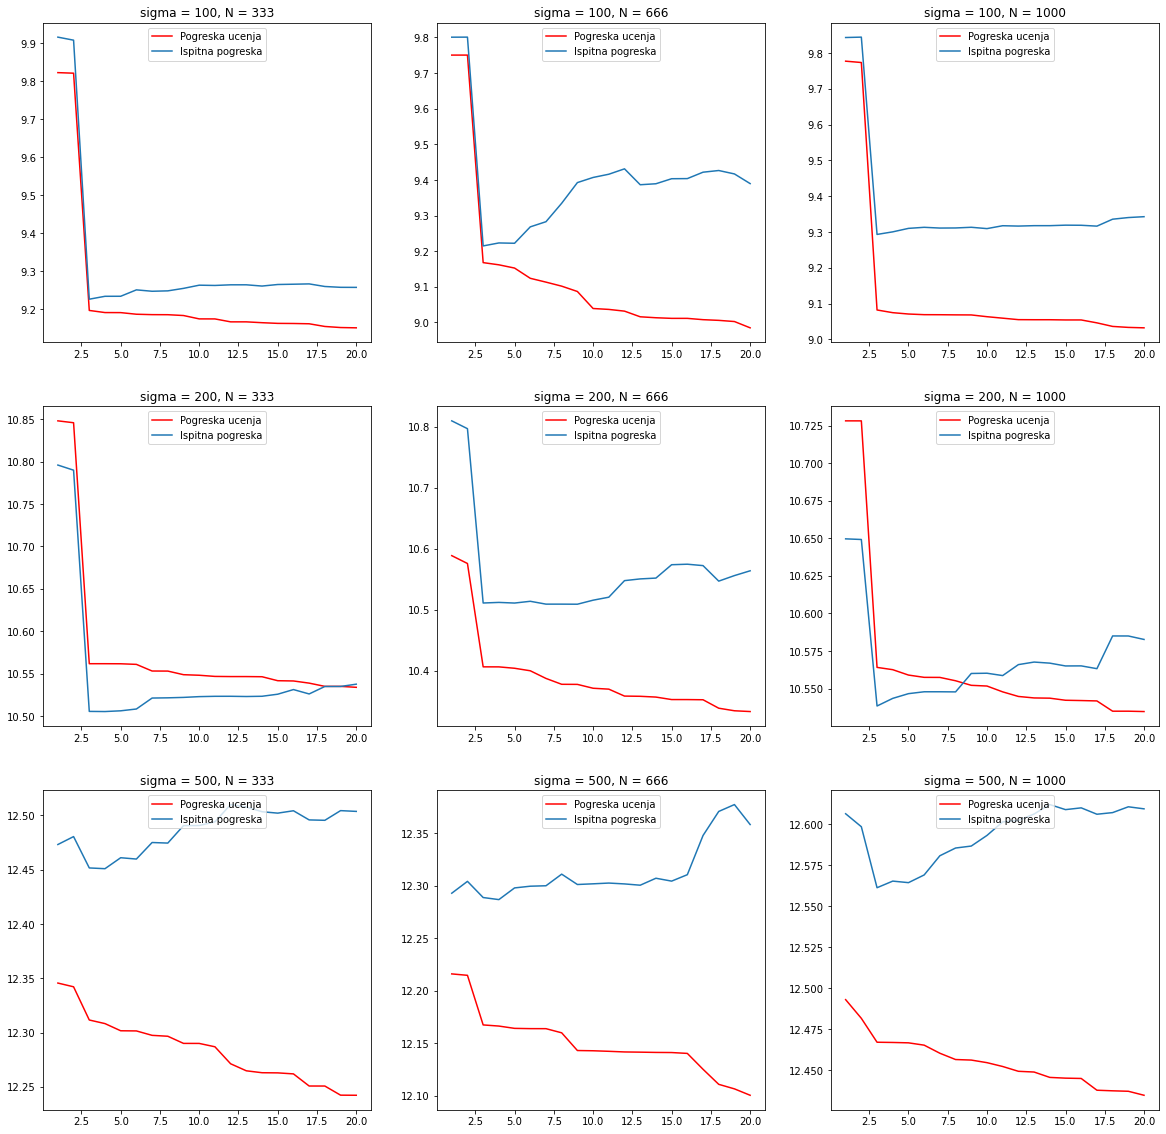

In [16]:
# Vaš kôd ovdje
import random
fig, axs = plt.subplots(3, 3, figsize = (20, 20))
N = 1000
s = [100, 200, 500]
d = range(1, 21)

x_3 = make_instances(donja_granica, gornja_granica, N)
X_train, X_test = train_test_split(x_3, test_size = 0.5)

x1_train_p = np.random.choice(X_train.shape[0], int(1/3 * len(X_train)), False)
x1_train = X_train[x1_train_p]
x1_test_p = np.random.choice(X_test.shape[0], int(1/3 * len(X_test)), False)
x1_test = X_train[x1_test_p]

x2_train_p = np.random.choice(X_train.shape[0], int(2/3 * len(X_train)), False)
x2_train = X_train[x2_train_p]
x2_test_p = np.random.choice(X_test.shape[0], int(2/3 * len(X_test)), False)
x2_test = X_train[x2_test_p]

k = 0
for j in s:
    y_train = make_labels(X_train, f, j)
    y_test = make_labels(X_test, f, j)
    
    y1_train = make_labels(x1_train, f, j)
    y1_test = make_labels(x1_test, f, j)
    
    y2_train = make_labels(x2_train, f, j)
    y2_test = make_labels(x2_test, f, j)
    
    train_E = []
    test_E = []
    train_E1 = []
    test_E1 = []
    train_E2 = []
    test_E2 = []
    
    for i in d:
        train_fi = PolynomialFeatures(i).fit_transform(X_train)
        w = linalg.pinv(train_fi)
        w = np.dot(w, y_train)
        train_h = np.dot(train_fi, w)
        E4 = mean_squared_error(y_train, train_h)
        train_E.append(np.log(E4))
    
        test_fi = PolynomialFeatures(i).fit_transform(X_test)
        test_h = np.dot(test_fi, w)
        E4 = mean_squared_error(y_test, test_h)
        test_E.append(np.log(E4))
        
        train_fi1 = PolynomialFeatures(i).fit_transform(x1_train)
        w = linalg.pinv(train_fi1)
        w = np.dot(w, y1_train)
        train_h = np.dot(train_fi1, w)
        E4 = mean_squared_error(y1_train, train_h)
        train_E1.append(np.log(E4))
    
        test_fi1 = PolynomialFeatures(i).fit_transform(x1_test)
        test_h = np.dot(test_fi1, w)
        E4 = mean_squared_error(y1_test, test_h)
        test_E1.append(np.log(E4))
        
        train_fi2 = PolynomialFeatures(i).fit_transform(x2_train)
        w = linalg.pinv(train_fi2)
        w = np.dot(w, y2_train)
        train_h = np.dot(train_fi2, w)
        E4 = mean_squared_error(y2_train, train_h)
        train_E2.append(np.log(E4))
    
        test_fi2 = PolynomialFeatures(i).fit_transform(x2_test)
        test_h = np.dot(test_fi2, w)
        E4 = mean_squared_error(y2_test, test_h)
        test_E2.append(np.log(E4))
    
    axs[k][0].plot(d, train_E, 'r', label = 'Pogreska ucenja')
    axs[k][0].plot(d, test_E, label = 'Ispitna pogreska')
    axs[k][0].legend(loc = 'upper center')
    axs[k][0].title.set_text('sigma = ' + str(j) + ', N = ' + str(int(1/3 * 1000)))
    
    axs[k][1].plot(d, train_E1, 'r', label = 'Pogreska ucenja')
    axs[k][1].plot(d, test_E1, label = 'Ispitna pogreska')
    axs[k][1].legend(loc = 'upper center')
    axs[k][1].title.set_text('sigma = ' + str(j) + ', N = ' + str(int(2/3 * 1000)))
    
    axs[k][2].plot(d, train_E2, 'r', label = 'Pogreska ucenja')
    axs[k][2].plot(d, test_E2, label = 'Ispitna pogreska')
    axs[k][2].legend(loc = 'upper center')
    axs[k][2].title.set_text('sigma = ' + str(j) + ', N = ' + str(1000))
    
    k += 1
plt.show()       

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [17]:
# Vaš kôd ovdje
d = 3
lamb = [0, 1, 10]
d_fi = PolynomialFeatures(d).fit_transform(X)
w_cl = np.dot(np.transpose(d_fi), d_fi)
I = np.identity(d + 1)
for i in lamb:
    w = linalg.inv(w_cl + np.dot(i, I))
    w = np.dot(np.dot(w, np.transpose(d_fi)), y)
    print(w)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [18]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
w = []
for i in lamb:
    rng = Ridge(i).fit(d_fi, y)
    for j in rng.coef_:
        w.append(j)
    w[0] = rng.intercept_
    print(w)
    w.clear()

[4.000000000000025, -5.916666666666765, 3.375000000000053, -0.4583333333333405]
[3.0569614512471652, -0.6907936507936512, -0.2831746031746025, 0.14458049886621302]
[2.4944418431229733, -0.1589729487341474, -0.1342306653684832, 0.08156009919705873]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

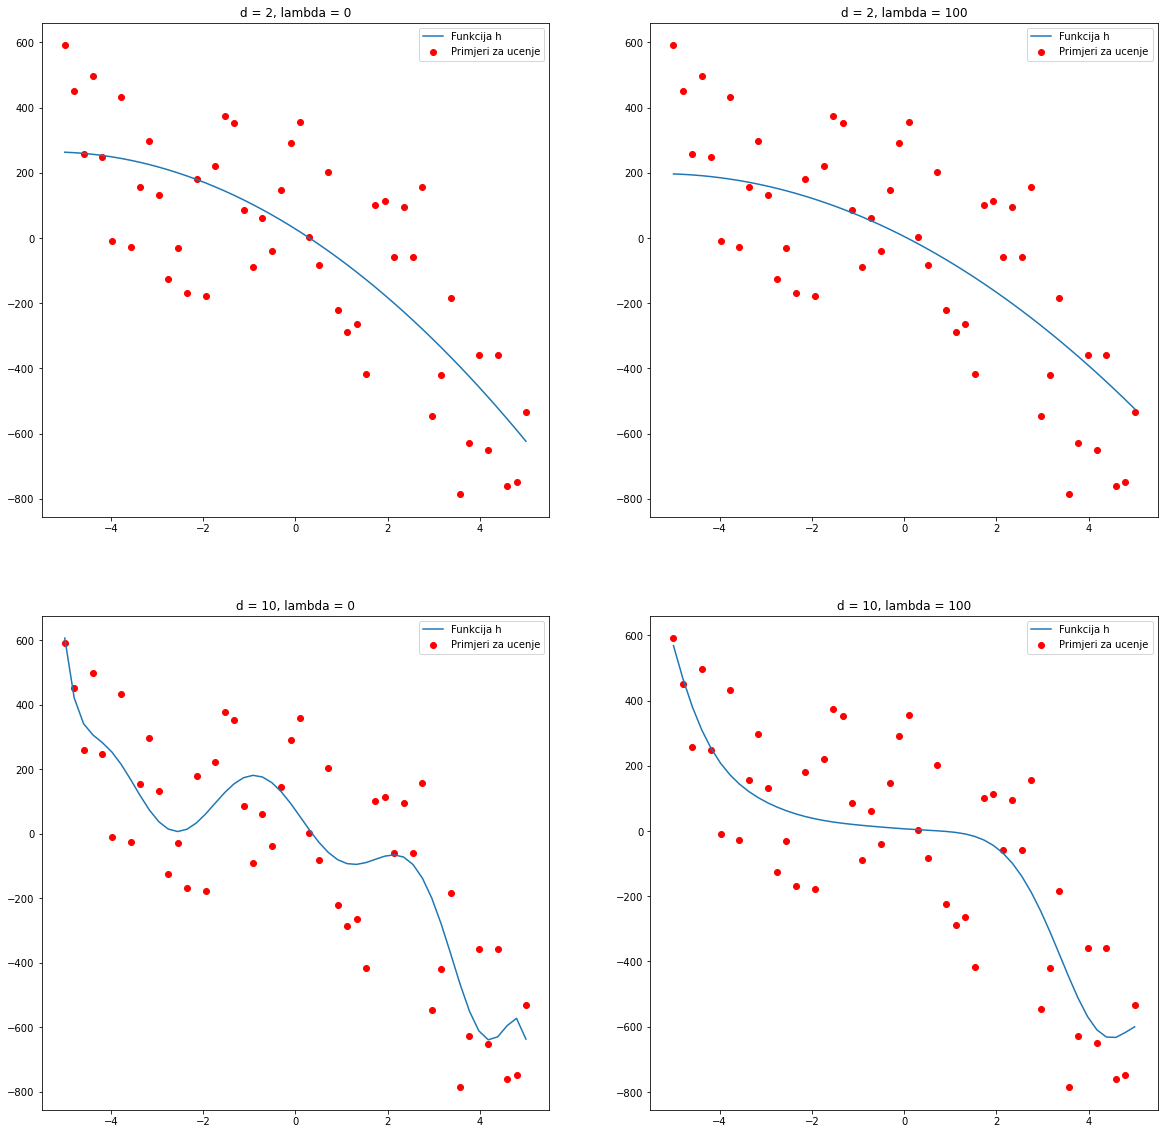

In [19]:
# Vaš kôd ovdje
lamb = [0, 100]
d = [2, 10]
fig, axs = plt.subplots(2, 2, figsize = (20, 20))
h = []
for i in d:
    d_fi = PolynomialFeatures(i).fit_transform(x_2)
    I = np.identity(i + 1)
    for j in lamb:
        w = np.dot(np.transpose(d_fi), d_fi)
        w = linalg.inv(w + np.dot(j, I))
        w = np.dot(np.dot(w, np.transpose(d_fi)), y_2)
        h_p = np.dot(d_fi, w)
        h.append(h_p)
k = 0
for i in range(len(d)):
    for j in range(len(lamb)):
        axs[i][j].plot(x_2, h[k], label = 'Funkcija h')
        axs[i][j].scatter(x_2, y_2, color = 'red', label = 'Primjeri za ucenje')
        axs[i][j].title.set_text('d = ' + str(d[i]) + ', lambda = ' + str(lamb[j]))
        axs[i][j].legend(loc = 'upper right')
        k += 1
plt.show()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


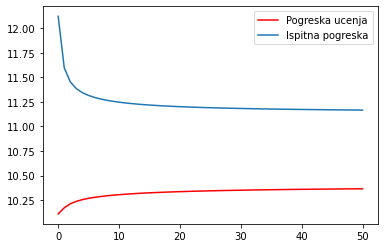

In [20]:
# Vaš kôd ovdje
lamb = range(0, 51)
d = 10
train_E = []
test_E = []
I = np.identity(d + 1)
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size = 0.5)
for i in lamb:
    train_fi = PolynomialFeatures(d).fit_transform(X_train)
    w = np.dot(np.transpose(train_fi), train_fi)
    w = linalg.inv(w + np.dot(i, I))
    w = np.dot(np.dot(w, np.transpose(train_fi)), y_train)
    train_h = np.dot(train_fi, w)
    E4 = mean_squared_error(y_train, train_h)
    train_E.append(np.log(E4))
    
    test_fi = PolynomialFeatures(d).fit_transform(X_test)
    test_h = np.dot(test_fi, w)
    E4 = mean_squared_error(y_test, test_h)
    test_E.append(np.log(E4))
plt.plot(lamb, train_E, 'r', label = 'Pogreska ucenja')
plt.plot(lamb, test_E, label = 'Ispitna pogreska')
plt.legend(loc = 'upper right')
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [21]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

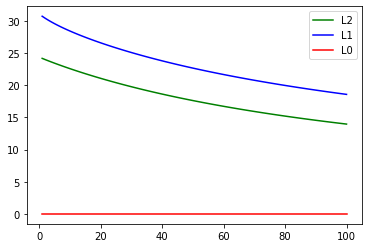

In [22]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
def L2(w):
    return math.sqrt(np.dot(np.transpose(w), w))
def L1(w):
    return sum(abs(w))
lamb = range(1, 101)
d = 5
L2_l = []
L1_l = []
L0_l = []
d_fi = PolynomialFeatures(d).fit_transform(X_train_3)
for i in lamb:
    rng = Ridge(i).fit(d_fi, y_train_3)
    w = rng.coef_
    L2_l.append(L2(w.reshape(-1, 1)))
    L1_l.append(L1(w))
    L0_l.append(nonzeroes(w))
plt.plot(lamb, L2_l, 'g', label = 'L2')
plt.plot(lamb, L1_l, 'b', label = 'L1')
plt.plot(lamb, L0_l, 'r', label= 'L0')
plt.legend(loc = 'upper right')
plt.show()
L2_l.clear()
L1_l.clear()
L0_l.clear()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

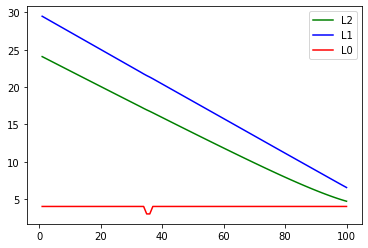

In [23]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
for i in lamb:
    las = Lasso(i).fit(d_fi, y_train_3)
    w = las.coef_
    L2_l.append(L2(w))
    L1_l.append(L1(w))
    L0_l.append(nonzeroes(w))
plt.plot(lamb, L2_l, 'g', label = 'L2')
plt.plot(lamb, L1_l, 'b', label = 'L1')
plt.plot(lamb, L0_l, 'r', label= 'L0')
plt.legend(loc = 'upper right')
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [24]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

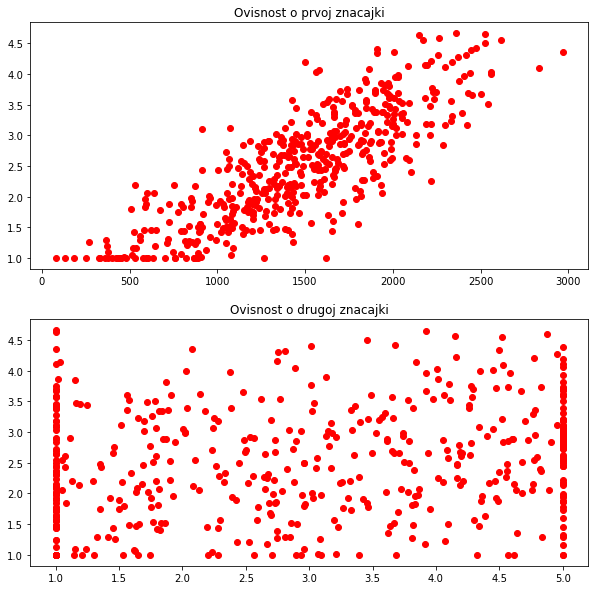

In [25]:
# Vaš kôd ovdje
fig, axs = plt.subplots(2, 1, figsize = (10, 10))
axs[0].scatter(exam_score, grades_y, color = 'red')
axs[0].title.set_text('Ovisnost o prvoj znacajki')
axs[1].scatter(grade_in_highschool, grades_y, color = 'red')
axs[1].title.set_text('Ovisnost o drugoj znacajki')
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [26]:
# Vaš kôd ovdje
lamb = 0.01
w = []
rng = Ridge(lamb).fit(grades_X, grades_y)
w.append(rng.intercept_)
for j in rng.coef_:
    w.append(j)
print(w)

[0.15061179575776018, 0.0014149686631874092, 0.09477275879174112]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [27]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))
w = []
rng = Ridge(lamb).fit(grades_X_fixed, grades_y_fixed)
w.append(rng.intercept_[0])
for i in rng.coef_[0]:
    w.append(i)
print(w)

[8.625513311328875e-17, 0.8163037502836595, 0.15167761205975838]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [28]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.insert(grades_X_fixed, 2, grades_X_fixed[:, 1], axis = 1)
# print(grades_X_fixed_colinear)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [29]:
# Vaš kôd ovdje
lamb = 0.01
w = []
rng = Ridge(lamb).fit(grades_X_fixed_colinear, grades_y)
w.append(rng.intercept_)
for j in rng.coef_:
    w.append(j)
print('Za grades_y')
print(w)
w.clear()
rng = Ridge(lamb).fit(grades_X_fixed_colinear, grades_y_fixed)
w.append(rng.intercept_[0])
for i in rng.coef_[0]:
    w.append(i)
print('Za grades_y_fixed')
print(w)

Za grades_y
[2.5030316359918503, 0.7395467282948262, 0.06870838527829623, 0.0687083852792501]
Za grades_y_fixed
[8.625597096332916e-17, 0.8163036374131405, 0.0758395685865072, 0.07583956858759848]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [30]:
# Vaš kôd ovdje
lamb1 = 0.01
lamb2 = 1000
w_lamb1 = []
w_lamb2 = []

for i in range(10):
    x_index = np.random.choice(grades_X_fixed_colinear.shape[0], int(0.5 * len(grades_X_fixed_colinear)), False)
    x_elements = grades_X_fixed_colinear[x_index]
    y_elements = grades_y[x_index]
    # x_elements, x_test, y_elements, y_test = train_test_split(grades_X_fixed_colinear, grades_y, test_size = 0.5)
    
    w = []
    rng = Ridge(lamb1).fit(x_elements, y_elements)
    w.append(rng.intercept_)
    for j in rng.coef_:
        w.append(j)
    w_lamb1.append(w)
    print('Za lambda = ' + str(lamb1))
    print(w)
    
    w = []
    rng = Ridge(lamb2).fit(x_elements, y_elements)
    w.append(rng.intercept_)
    for j in rng.coef_:
        w.append(j)
    w_lamb2.append(w)
    print('Za lambda = ' + str(lamb2))
    print(w)

print('Uz lambda = 0.01, dev = ' + str(np.std(w_lamb1, axis = 0)))
print('Uz lambda = 1000, dev = ' + str(np.std(w_lamb2, axis = 0)))

Za lambda = 0.01
[2.510422673952886, 0.7641402192224486, 0.08065348788504133, 0.08065348788546739]
Za lambda = 1000
[2.524848313567114, 0.14875780329261945, 0.025518964975177853, 0.025518964975177843]
Za lambda = 0.01
[2.483639788387816, 0.7473930801240443, 0.06732183060205582, 0.06732183060326745]
Za lambda = 1000
[2.4748884331930503, 0.15254524412836026, 0.038055932635411564, 0.03805593263541157]
Za lambda = 0.01
[2.4940951479274442, 0.7428801740461696, 0.06719608493445722, 0.06719608493591873]
Za lambda = 1000
[2.5275810964709646, 0.15107603875379944, 0.03616773680337018, 0.0361677368033702]
Za lambda = 0.01
[2.520954417126266, 0.7235551159126036, 0.06948433499748718, 0.06948433499861015]
Za lambda = 1000
[2.548182385448458, 0.14705784700832714, 0.029477513787876403, 0.029477513787876407]
Za lambda = 0.01
[2.4898064802834807, 0.7593356258299679, 0.06302567347775295, 0.06302567348027312]
Za lambda = 1000
[2.524649733886955, 0.15491875388337648, 0.03612425323675207, 0.0361242532367520

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.